In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd['House Price'] = boston_dataset.target

#boston_pd_target = np.asarray(boston_dataset.target) 
#boston_pd['House Price'] = pd.Series(boston_pd_target)

In [5]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
X = boston_pd.iloc[:, :-1] 
Y = boston_pd.iloc[:, -1] 

In [7]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: House Price, Length: 506, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((354, 13), (354,), (152, 13), (152,))

In [10]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train)

LinearRegression()

In [11]:
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test)
lreg_y_pred

array([22.21016838, 22.53160182, 17.38599782, 16.96602204, 20.4410915 ,
       25.44198946, 22.78845502, 35.58980612, 30.85762717, 23.99060653,
       27.41413861, 25.34854054, 36.88351048, 22.50545561, 25.66462461,
       22.13823606, 24.61902758, 21.96952737, 16.53013376, 21.16225828,
       16.84589989, 24.47454095, 22.20201663, 14.82804157, 23.76937078,
       24.98640841, 17.23786817, 20.49455037, 12.60414657, 16.77332721,
       22.41954133, 11.50830832,  6.28134153, 24.01843036, 19.00031259,
       18.50870688, 13.70775722, 35.4873183 , 18.48626556, 27.01796123,
       17.2900947 , 35.12370713, 25.96830911, 42.44714472, 34.58928686,
       10.78747101, 30.60691853, 11.70664911, 29.2731858 , 20.99919517,
       28.8100757 ,  7.96326741, 13.69791875, 34.25785817,  5.42665474,
       15.91963982, 21.91196674, 15.66653181, 24.55739215, 27.20603236,
       21.6370749 , 23.90557285, 19.14980057, 13.91111927, 20.06650327,
       27.21953262, 29.30217797, 30.71729649, 33.86071539, 14.04

In [12]:
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  23.878031439852492


In [13]:
# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Features"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
lreg_coefficient

,Features,Coefficient Estimate
0,CRIM,-0.117651
1,ZN,0.054555
2,INDUS,0.049137
3,CHAS,3.789565
4,NOX,-23.135873
5,RM,3.825696
6,AGE,0.005175
7,DIS,-1.647823
8,RAD,0.285778
9,TAX,-0.010815


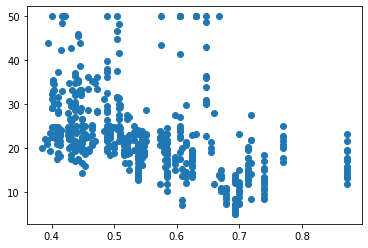

In [14]:
plt.scatter(boston_pd['NOX'], boston_pd['House Price'])

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Features'>

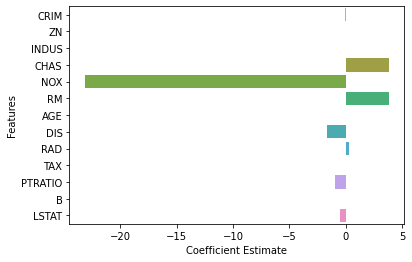

In [16]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Features', data=lreg_coefficient)

In [17]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge

# Train the model 
ridgeR = Ridge(alpha = 2) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test)

In [18]:
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

22.869255343967094


In [19]:
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
ridge_coefficient

,Columns,Coefficient Estimate
0,CRIM,-0.109101
1,ZN,0.057903
2,INDUS,-0.011099
3,CHAS,3.389477
4,NOX,-7.739873
5,RM,3.811342
6,AGE,-0.006647
7,DIS,-1.372852
8,RAD,0.256824
9,TAX,-0.012860


#### # import Lasso regression from sklearn library 



In [20]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 0.05) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test)

In [21]:
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 

Mean squared error on test set 22.761488155446138


In [22]:
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
lasso_coeff

,Columns,Coefficient Estimate
0,CRIM,-0.106495
1,ZN,0.058718
2,INDUS,-0.013617
3,CHAS,2.922264
4,NOX,-5.096917
5,RM,3.744468
6,AGE,-0.007056
7,DIS,-1.298924
8,RAD,0.252858
9,TAX,-0.013394


In [23]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .01, l1_ratio = .3) 
e_net.fit(x_train, y_train) 

ElasticNet(alpha=0.01, l1_ratio=0.3)

In [24]:
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

Mean Squared Error on test set 22.8415752943696


In [25]:
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

,Columns,Coefficient Estimate
0,CRIM,-0.108382
1,ZN,0.058341
2,INDUS,-0.015594
3,CHAS,3.277725
4,NOX,-6.361037
5,RM,3.789031
6,AGE,-0.007445
7,DIS,-1.346862
8,RAD,0.255199
9,TAX,-0.013097
